0. Context

Neste projeto, vamos analisar a relação entre o consumo de eletricidade e a temperatura média nas três maiores cidades do sudeste do Brasil: São Paulo, Rio de Janeiro e Belo Horizonte. Utilizaremos um banco de dados de consumo de eletricidade e um conjunto de dados de temperatura média disponível neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv). Os dados de temperatura foram extraídos diretamente do [site](https://portal.inmet.gov.br) do Instituto Nacional de Meteorologia (INMET), uma agência governamental vinculada ao Ministério da Agricultura, Pecuária e Abastecimento. O objetivo é investigar como as variações de temperatura influenciam o consumo de eletricidade nessas cidades.

1. Packages and libraries

In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

2. Loads

2.1 Energy data

In [194]:
# Carrega os dados de energia em uma variável 

URL_e = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv'

In [195]:
# Transforma o arquivo csv em um dataframe 'data_e'
# Informa que há coluna de data
# Se adequa ao formato que a data está apresentada

data_e = pd.read_csv(URL_e, sep=';', parse_dates=[0], infer_datetime_format=True)

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\3424972916.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_e = pd.read_csv(URL_e, sep=';', parse_dates=[0], infer_datetime_format=True)


In [196]:
data_e.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [197]:
data_e.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


Granularidade: Mensal

Intervalo de tempo: 01/01/2004 - 01/12/2020


2.2 Temperature data

In [198]:
# Carrega os dados de temperatura em uma variável 

URL_t = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' 

In [199]:
# Transforma o arquivo csv em um dataframe 'data_t'
# Informa que há coluna de data
# Se adequa ao formato que a data está apresentada

data_t = pd.read_csv(URL_t, sep=';', parse_dates=[0], infer_datetime_format=True) 

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\1317524579.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_t = pd.read_csv(URL_t, sep=';', parse_dates=[0], infer_datetime_format=True)


In [200]:
data_t.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [201]:
data_t.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


Granularidade: Diária

Intervalo de tempo: 15/07/2018 - 31/12/2020	

3. Data Wrangling

3.1 Indexing

In [202]:
# Indexa a coluna 'referencia' em 'data_e' 

data_e = data_e.set_index(keys=['referencia'])
data_e.head()

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084


In [203]:
# Indexa a coluna 'referencia' em 'data_t' 

data_t = data_t.set_index(keys=['referencia'])
data_t.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0
2018-07-18,18,23.0,19.0
2018-07-19,19,23.0,19.0


3.2 Slicing

In [204]:
# Filtra os dados de 'data_e' para o intervalo de 2019 a 2020 

data_e_slicing = data_e.loc['2019':'2020']
data_e_slicing.head()

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


In [205]:
data_e_slicing.shape

(24, 3)

In [206]:
# Filtra os dados de 'data_t' para o intervalo de 2019 a 2020 

data_t_slicing = data_t.loc['2019':'2020']
data_t_slicing.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2019-01-01,22,28.0,21.0
2019-01-02,25,28.0,24.0
2019-01-03,26,31.0,24.0
2019-01-04,23,31.0,22.0
2019-01-05,21,28.0,23.0


In [207]:
data_t_slicing.shape

(731, 3)

In [208]:
# Remove toda linha que tiver ao menos um valor Null

data_t_slicing.dropna(inplace=True)

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\236228017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t_slicing.dropna(inplace=True)


In [209]:
data_t_slicing.shape

(643, 3)

In [210]:
# gera uma nova coluna 'temp-media' por meio da média das demais colunas de temperatura média

data_t_slicing['temp-media'] = data_t_slicing[[
    'temp-media-sp', 'temp-media-rj', 'temp-media-mg' 
    ]].mean(axis=1)

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\4007930459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t_slicing['temp-media'] = data_t_slicing[[


In [211]:
data_t_slicing.head()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-01,22,28.0,21.0,23.666667
2019-01-02,25,28.0,24.0,25.666667
2019-01-03,26,31.0,24.0,27.000000
2019-01-04,23,31.0,22.0,25.333333
2019-01-05,21,28.0,23.0,24.000000


In [212]:
# Ajusta a granulidade de 'data_t_slicing' para mensal

data_t_resampled = data_t_slicing.resample(rule='1m').mean()

In [213]:
data_t_resampled.shape

(24, 4)

4. Correlation

4.1 Residential consumption

4.1.1 Average temperature of the southeast

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\3574685764.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=data_t_resampled, x='referencia', y='temp-media', marker="1", palette="pastel")


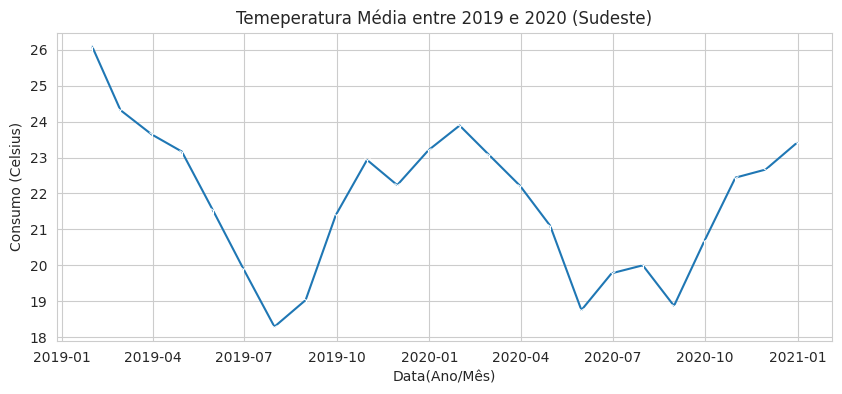

In [214]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data_t_resampled, x='referencia', y='temp-media', marker="1", palette="pastel")
  grafico.set(title='Temeperatura Média entre 2019 e 2020 (Sudeste)', ylabel='Consumo (Celsius)', xlabel='Data(Ano/Mês)')
  grafico.figure.set_size_inches(10, 4)


4.1.2 Residential energy consumption

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\843797608.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=data_e_slicing, x='referencia', y='residencial', marker="1", palette="pastel")


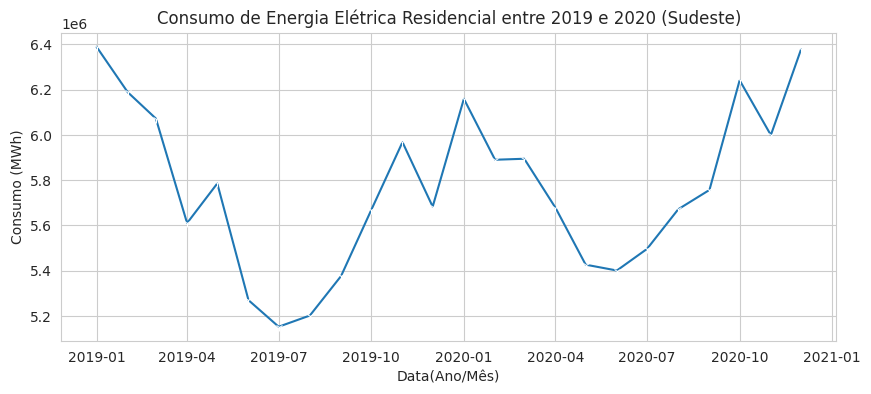

In [215]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data_e_slicing, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial entre 2019 e 2020 (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data(Ano/Mês)')
  grafico.figure.set_size_inches(10, 4)

4.1.3 Residencial energy consumption X Average temperature of the southeast

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\2170360497.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data_e_slicing, x='referencia', y='residencial', marker="o", palette="pastel", ax=ax1, color=color)
C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\2170360497.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data_t_resampled, x='referencia', y='temp-media', marker="o", palette="pastel", ax=ax2, color=color)


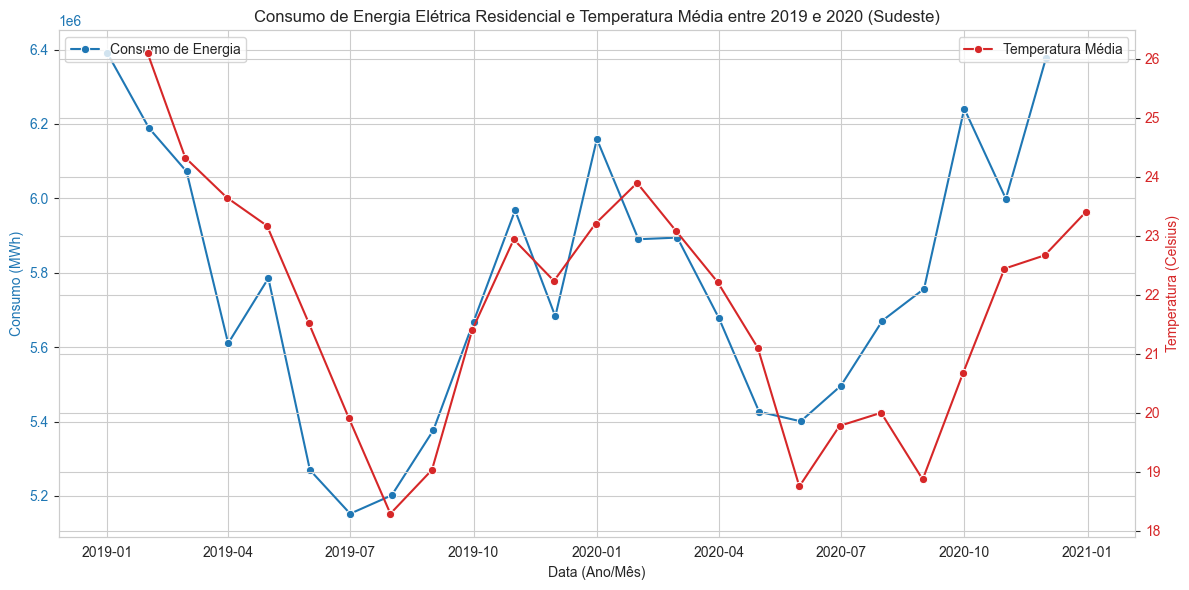

In [216]:
with sns.axes_style('whitegrid'):
    # Criação da figura e do eixo
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Gráfico de linha para consumo de energia
    color = 'tab:blue'
    ax1.set_xlabel('Data (Ano/Mês)')
    ax1.set_ylabel('Consumo (MWh)', color=color)
    sns.lineplot(data=data_e_slicing, x='referencia', y='residencial', marker="o", palette="pastel", ax=ax1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_title('Consumo de Energia Elétrica Residencial e Temperatura Média entre 2019 e 2020 (Sudeste)')

    # Criação de um segundo eixo y para a temperatura média
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Temperatura (Celsius)', color=color)
    sns.lineplot(data=data_t_resampled, x='referencia', y='temp-media', marker="o", palette="pastel", ax=ax2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Adiciona uma legenda para cada eixo
    ax1.legend(['Consumo de Energia'], loc='upper left')
    ax2.legend(['Temperatura Média'], loc='upper right')

    # Ajusta o layout para evitar sobreposição
    fig.tight_layout()
    plt.show()

Pode-se sugerir que a temperatura tem alguma relação com o consumo de energia elétrica, pois os padrões parecem semelhantes. No entanto, para afirmar que a temperatura é um bom atributo para prever o consumo de energia elétrica residencial, é essencial realizar análises estatísticas para quantificar e validar essa relação e eliminar a possibilidade de uma correlação espúria.

4.1.3 Decomposition of components

In [217]:
# Decompoe a série temporal da coluna 'residencial' em seus componentes 
decomposicao = sm.tsa.seasonal_decompose(data_e_slicing[['residencial']], model='additive')

In [218]:
residuo = pd.DataFrame(decomposicao.resid).rename(columns={'resid': 'residuo'})
tendencia = pd.DataFrame(decomposicao.trend).rename(columns={'trend': 'tendencia'})
sazonalidade = pd.DataFrame(decomposicao.seasonal).rename(columns={'seasonal': 'sazonalidade'})

In [219]:
sazonalidade.head(10)

,sazonalidade
referencia,
2019-01-01,581458.940972
2019-02-01,278331.565972
2019-03-01,247303.815972
2019-04-01,-8801.017361
2019-05-01,-285650.517361
2019-06-01,-341776.309028
2019-07-01,-473944.517361
2019-08-01,-402405.434028
2019-09-01,-207950.059028


In [220]:
residuo.head()

,residuo
referencia,
2019-01-01,NaN
2019-02-01,NaN
2019-03-01,NaN
2019-04-01,NaN
2019-05-01,NaN


In [236]:
combined_df = pd.merge(sazonalidade, data_e_slicing, on='referencia')

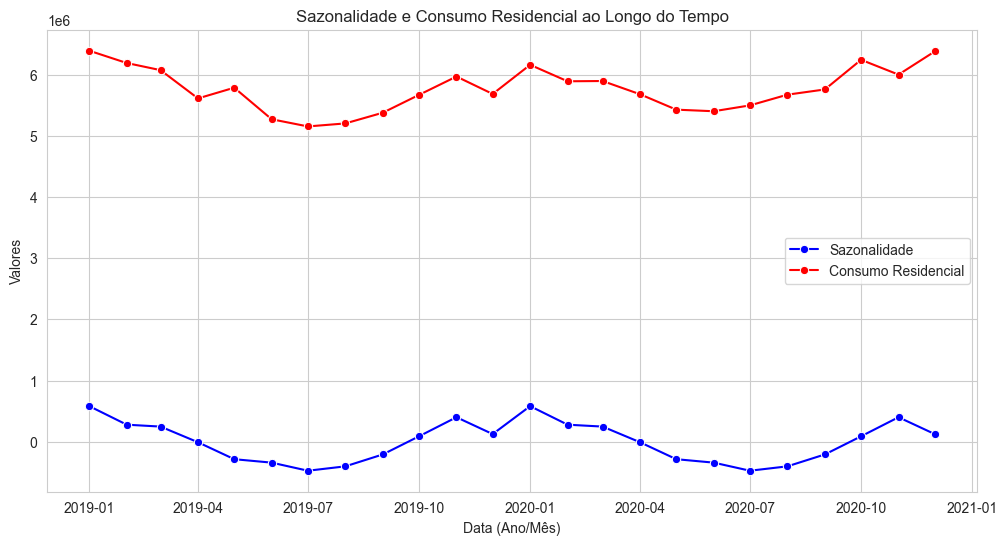

In [237]:
sns.set_style('whitegrid')


plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='referencia', y='sazonalidade', marker='o', color='b', label='Sazonalidade')
sns.lineplot(data=combined_df, x='referencia', y='residencial', marker='o', color='r', label='Consumo Residencial')


plt.title('Sazonalidade e Consumo Residencial ao Longo do Tempo')
plt.ylabel('Valores')
plt.xlabel('Data (Ano/Mês)')
plt.legend()

4.2 Commercial consumption

4.2.1 Average temperature of the southeast

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\120878825.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=data_t_resampled, x='referencia', y='temp-media', marker="1", palette="pastel")


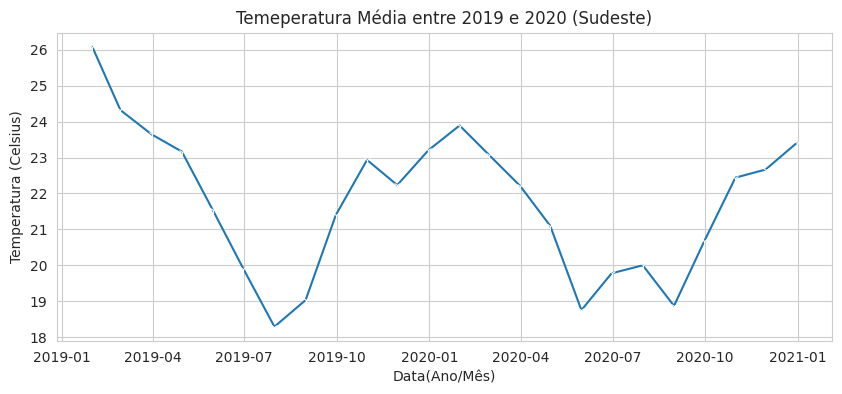

In [223]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data_t_resampled, x='referencia', y='temp-media', marker="1", palette="pastel")
  grafico.set(title='Temeperatura Média entre 2019 e 2020 (Sudeste)', ylabel='Temperatura (Celsius)', xlabel='Data(Ano/Mês)')
  grafico.figure.set_size_inches(10, 4)


4.2.2 Commercial energy consumption

In [224]:
data_e_slicing.head()

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\3209413734.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=data_e_slicing, x='referencia', y='comercial', marker="1", palette="pastel")


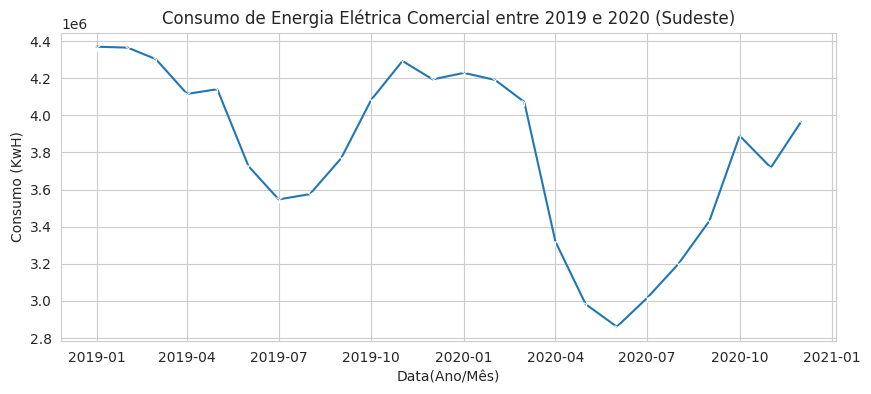

In [225]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data_e_slicing, x='referencia', y='comercial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Comercial entre 2019 e 2020 (Sudeste)', ylabel='Consumo (KwH)', 
              xlabel='Data(Ano/Mês)')
  grafico.figure.set_size_inches(10, 4)


3.2.3 4.3.3 Commerical energy consumption X Average temperature of the southeast

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\3473836170.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data_e_slicing, x='referencia', y='comercial', marker="o", palette="pastel", ax=ax1, color=color)
C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\3473836170.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data_t_resampled, x='referencia', y='temp-media', marker="o", palette="pastel", ax=ax2, color=color)


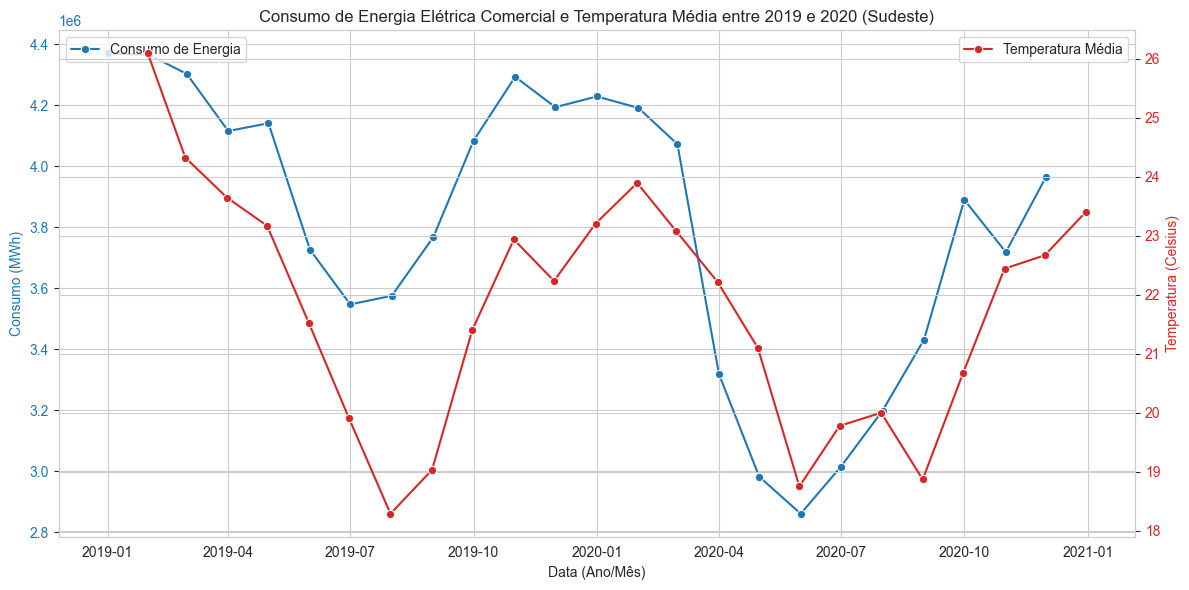

In [226]:
with sns.axes_style('whitegrid'):
    # Criação da figura e do eixo
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Gráfico de linha para consumo de energia
    color = 'tab:blue'
    ax1.set_xlabel('Data (Ano/Mês)')
    ax1.set_ylabel('Consumo (MWh)', color=color)
    sns.lineplot(data=data_e_slicing, x='referencia', y='comercial', marker="o", palette="pastel", ax=ax1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_title('Consumo de Energia Elétrica Comercial e Temperatura Média entre 2019 e 2020 (Sudeste)')

    # Criação de um segundo eixo y para a temperatura média
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Temperatura (Celsius)', color=color)
    sns.lineplot(data=data_t_resampled, x='referencia', y='temp-media', marker="o", palette="pastel", ax=ax2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Adiciona uma legenda para cada eixo
    ax1.legend(['Consumo de Energia'], loc='upper left')
    ax2.legend(['Temperatura Média'], loc='upper right')

    # Ajusta o layout para evitar sobreposição
    fig.tight_layout()
    plt.show()

No intervalo de outubro de 2019 até janeiro de 2020, a temperatura estava elevada devido ao verão, e o consumo de energia elétrica também estava alto, sugerindo uma correlação.

Entretanto, a correlação mais marcante ocorre entre março de 2020 e agosto de 2020, um período de pandemia de COVID-19. Durante esse tempo, os comércios estavam fechados, o que indica que não há uma relação direta entre o consumo de energia elétrica e a temperatura nesse período. 

Caímos em um impace e teremos que utilizar mais técnicas para verificar se há correlação.

4.3 Industry consumption

4.3.1 Average temperature of the southeast

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\120878825.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=data_t_resampled, x='referencia', y='temp-media', marker="1", palette="pastel")


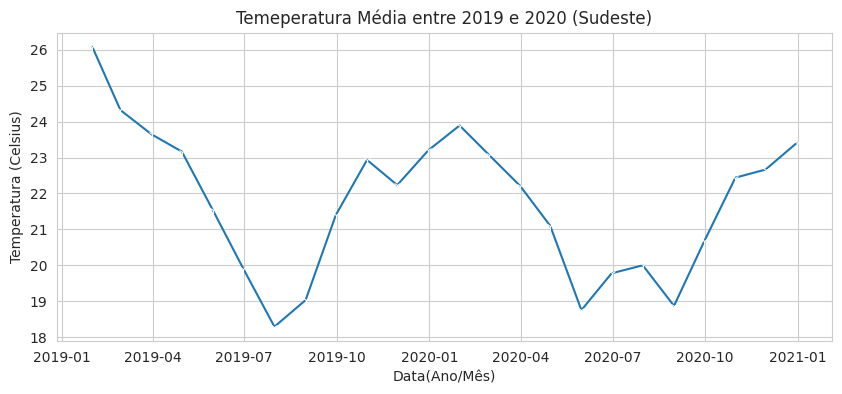

In [227]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data_t_resampled, x='referencia', y='temp-media', marker="1", palette="pastel")
  grafico.set(title='Temeperatura Média entre 2019 e 2020 (Sudeste)', ylabel='Temperatura (Celsius)', xlabel='Data(Ano/Mês)')
  grafico.figure.set_size_inches(10, 4)


4.3.2 Industrial energy consumption

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\620930217.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=data_e_slicing, x='referencia', y='industrial', marker="1", palette="pastel")


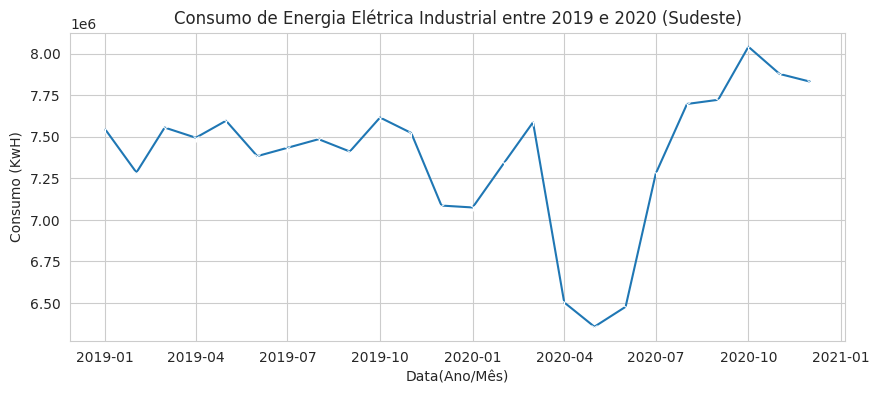

In [228]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data_e_slicing, x='referencia', y='industrial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Industrial entre 2019 e 2020 (Sudeste)', ylabel='Consumo (KwH)', 
              xlabel='Data(Ano/Mês)')
  grafico.figure.set_size_inches(10, 4)


4.3.3 Industrial energy consumption X Average temperature of the southeast

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\590739787.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data_e_slicing, x='referencia', y='industrial', marker="o", palette="pastel", ax=ax1, color=color)
C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_30268\590739787.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data_t_resampled, x='referencia', y='temp-media', marker="o", palette="pastel", ax=ax2, color=color)


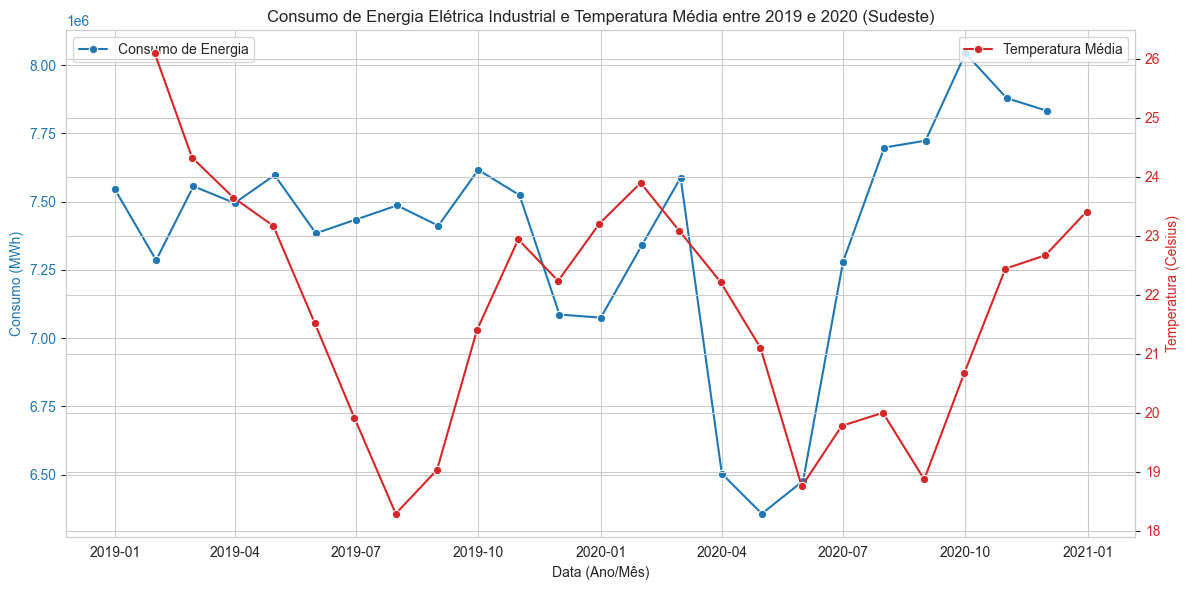

In [229]:
with sns.axes_style('whitegrid'):
    # Criação da figura e do eixo
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Gráfico de linha para consumo de energia
    color = 'tab:blue'
    ax1.set_xlabel('Data (Ano/Mês)')
    ax1.set_ylabel('Consumo (MWh)', color=color)
    sns.lineplot(data=data_e_slicing, x='referencia', y='industrial', marker="o", palette="pastel", ax=ax1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_title('Consumo de Energia Elétrica Industrial e Temperatura Média entre 2019 e 2020 (Sudeste)')

    # Criação de um segundo eixo y para a temperatura média
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Temperatura (Celsius)', color=color)
    sns.lineplot(data=data_t_resampled, x='referencia', y='temp-media', marker="o", palette="pastel", ax=ax2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Adiciona uma legenda para cada eixo
    ax1.legend(['Consumo de Energia'], loc='upper left')
    ax2.legend(['Temperatura Média'], loc='upper right')

    # Ajusta o layout para evitar sobreposição
    fig.tight_layout()
    plt.show()

Considerações:

De junho de 2019 até meados de setembro de 2019, há uma queda na temperatura, enquanto a energia se mantém mais linear. Isso provavelmente se deve ao fato de que, nesse período, temos o inverno, que não afeta diretamente o consumo de energia elétrica pelas indústrias.

Já entre março de 2020 e junho de 2020, observamos uma queda em ambas as variáveis, o que poderia sugerir alguma correlação. No entanto, esse período coincide com o início da pandemia de COVID-19, durante o qual as indústrias pararam de funcionar. Portanto, essa pausa nas atividades industriais retira a hipótese de correlação entre essas duas variáveis.